In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [64]:
csv_files = glob.glob(f"mutation-series-data\\*.csv")
df_list = [pd.read_csv(file, header=None, names=['parent_fit', 'mutant_fit', 'iteration', 'repr']) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

In [65]:
NUM_CATEGORIES = 4

In [66]:
sorted(df['repr'].unique())

[0, 1, 4, 9]

C:\Users\Maciej\AppData\Local\Temp\ipykernel_17692\1715290082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repr['parent_fit_bucket'] = pd.cut(df_repr['parent_fit'], bins=NUM_CATEGORIES, labels=[x for x in range(NUM_CATEGORIES)])


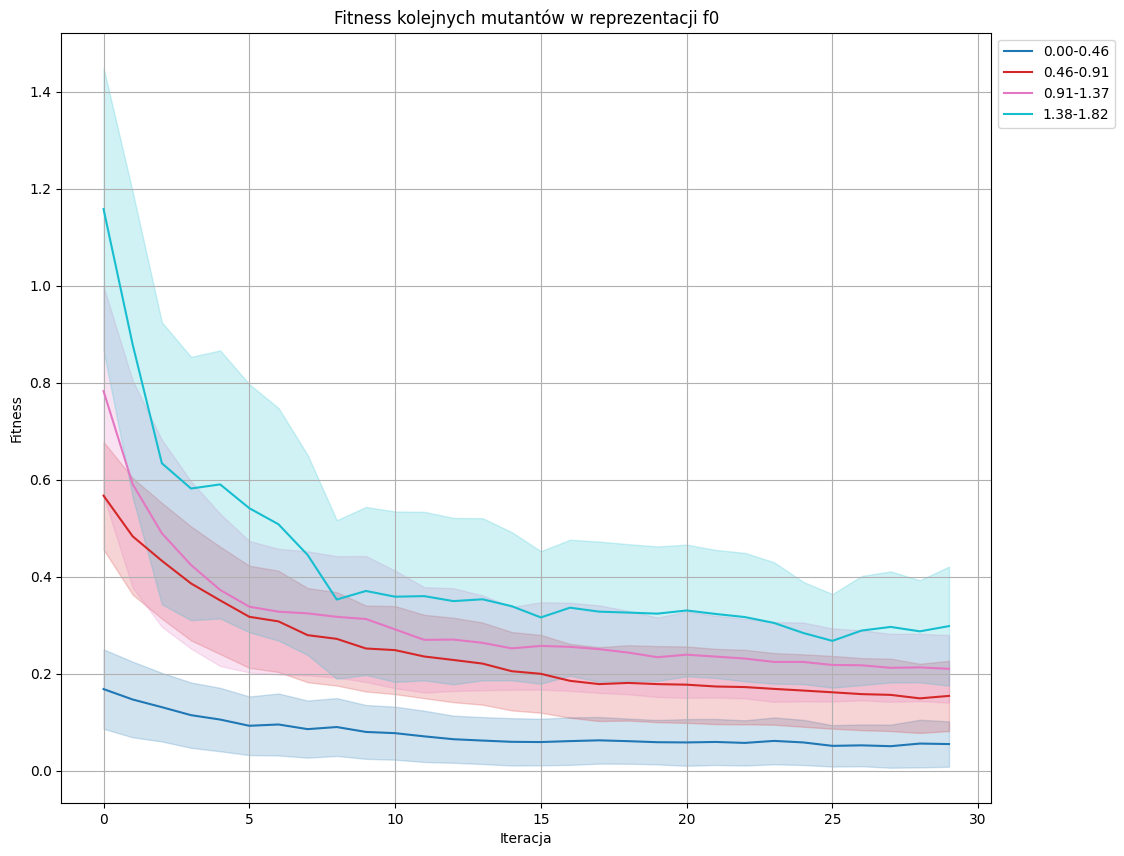

C:\Users\Maciej\AppData\Local\Temp\ipykernel_17692\1715290082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repr['parent_fit_bucket'] = pd.cut(df_repr['parent_fit'], bins=NUM_CATEGORIES, labels=[x for x in range(NUM_CATEGORIES)])


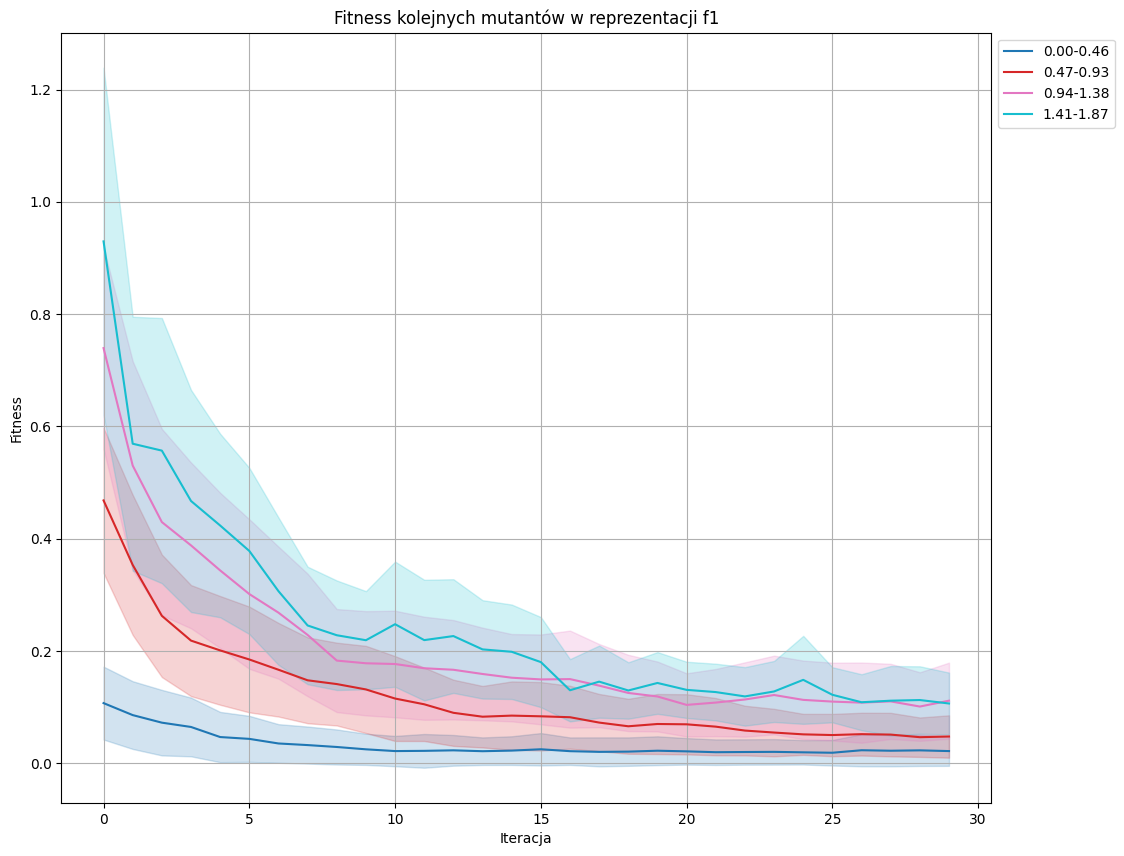

C:\Users\Maciej\AppData\Local\Temp\ipykernel_17692\1715290082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repr['parent_fit_bucket'] = pd.cut(df_repr['parent_fit'], bins=NUM_CATEGORIES, labels=[x for x in range(NUM_CATEGORIES)])


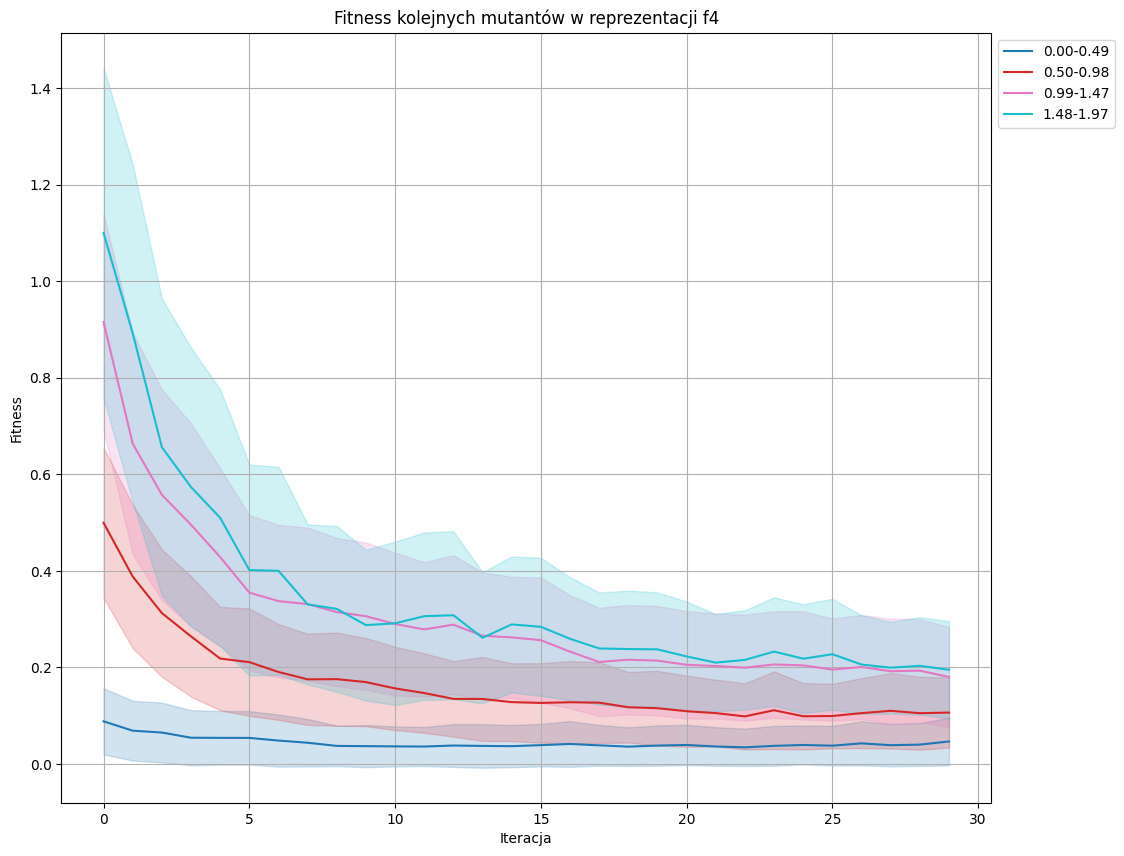

C:\Users\Maciej\AppData\Local\Temp\ipykernel_17692\1715290082.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repr['parent_fit_bucket'] = pd.cut(df_repr['parent_fit'], bins=NUM_CATEGORIES, labels=[x for x in range(NUM_CATEGORIES)])


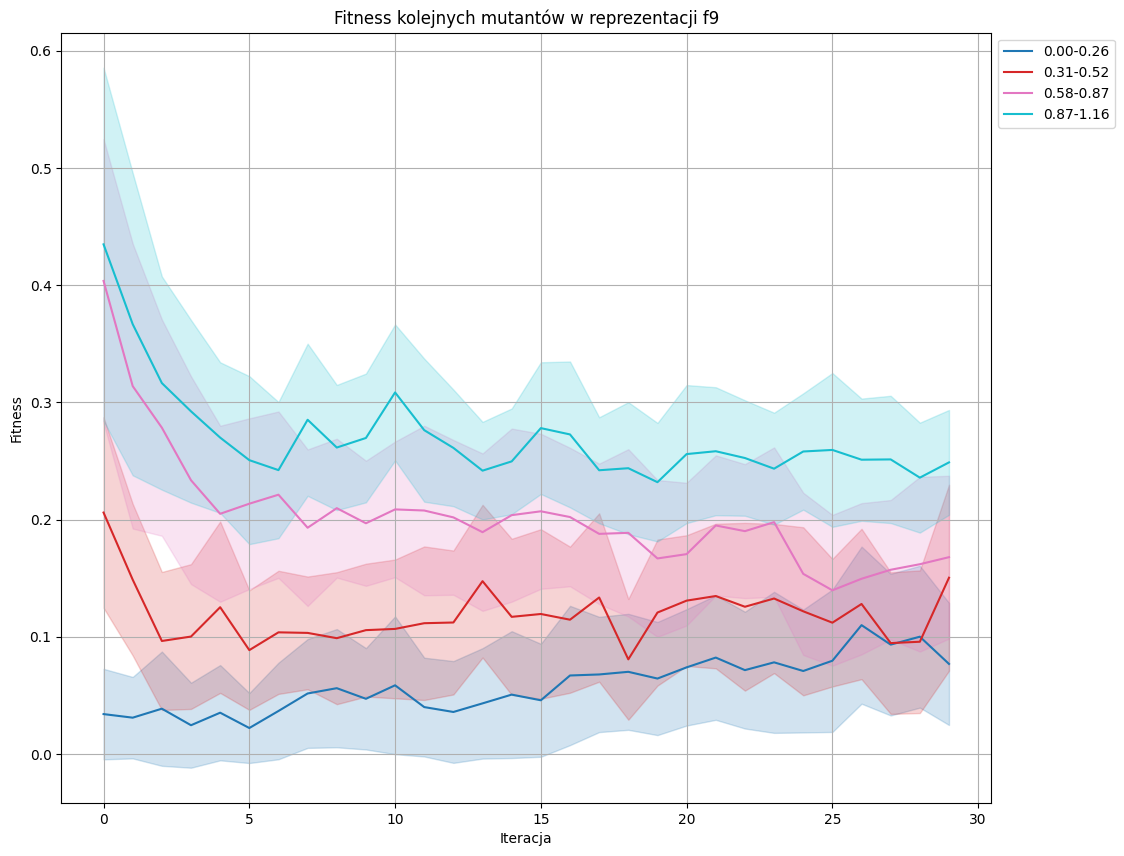

In [68]:
cmap = plt.cm.get_cmap('tab10', NUM_CATEGORIES)
colors = [cmap(i) for i in range(NUM_CATEGORIES)]
for repr in sorted(df['repr'].unique()):
    df_repr = df[df['repr'] == repr]
    df_repr['parent_fit_bucket'] = pd.cut(df_repr['parent_fit'], bins=NUM_CATEGORIES, labels=[x for x in range(NUM_CATEGORIES)])
    plt.figure(figsize=(12, 10))
    for i, (parent_fit_bucket_value, parent_fit_bucket_runs_df) in enumerate(df_repr.groupby('parent_fit_bucket')):
        mean_values = parent_fit_bucket_runs_df.groupby('iteration')['mutant_fit'].mean().values
        std_values = parent_fit_bucket_runs_df.groupby('iteration')['mutant_fit'].std().values
        gen_values = parent_fit_bucket_runs_df.groupby('iteration')['mutant_fit'].mean().index

        plt.plot(gen_values, mean_values, color=colors[i])
        plt.fill_between(gen_values, mean_values - std_values/2, mean_values + std_values/2, color=colors[i], alpha=0.2)
    for i, (parent_fit_bucket_value, parent_fit_bucket_runs_df) in enumerate(df_repr.groupby('parent_fit_bucket')):
        plt.plot([], [], color=colors[i], label=f'{parent_fit_bucket_runs_df["parent_fit"].min():.2f}-{parent_fit_bucket_runs_df["parent_fit"].max():.2f}')

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.title(f'Fitness kolejnych mutantów w reprezentacji f{repr}')
    plt.xlabel('Iteracja')
    plt.ylabel('Fitness')
    plt.grid(True)
    plt.show()